# CS-549 Assignment 3 - Linear Regression

# Andrick Mercado

In [1]:
# Importing required libraries
#import pip
#pip.main(['install', 'scikit-learn','--user'])

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')
%matplotlib inline


# Data
We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

Avg. Session Length: Average session of in-store style advice sessions.
Time on App: Average time spent on App in minutes
Time on Website: Average time spent on Website in minutes
Length of Membership: How many years the customer has been a member.
Read in the Ecommerce Customers csv file as a DataFrame called customers

# Task 1
1. Read the data into a dataframe(df) titled customers
2. Print the information regarding the columns in the df such as their data type, non-null counts etc.
3. Print the first few rows of the df.

In [2]:
'''
with open('Ecomm-Customers.csv', newline='') as csvfile:
    customers = list(csv.reader(csvfile))
    customers_object = csv.reader(csvfile)
print("Number of rows: ", len(customers), "Number of columns: ", len(customers[0]))  
print("Type of: ", customers_object )
print("Number of empty cells: ", customers.count([]))
print("Number of cells: ", (len(customers)*len(customers[0])))
print(customers)'''
data = pd.read_csv("Ecomm-Customers.csv")
print("Type of: ", type(data) )
print("Number of empty cells: ", len(data.isna().sum())-8 ) #because we have 8 columns
print("Number of rows: ", len(data),"Number of columns: ", len(data.columns))
print(data.dtypes)
data

Type of:  <class 'pandas.core.frame.DataFrame'>
Number of empty cells:  0
Number of rows:  500 Number of columns:  8
Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


# Task 2
Use the sns library which has been imported in the first cell and implement two functions
1. Find the correlation between all the columns in customers in terms of scatter-plots.
2. Find the correlation between all the columns in customers using heat maps.

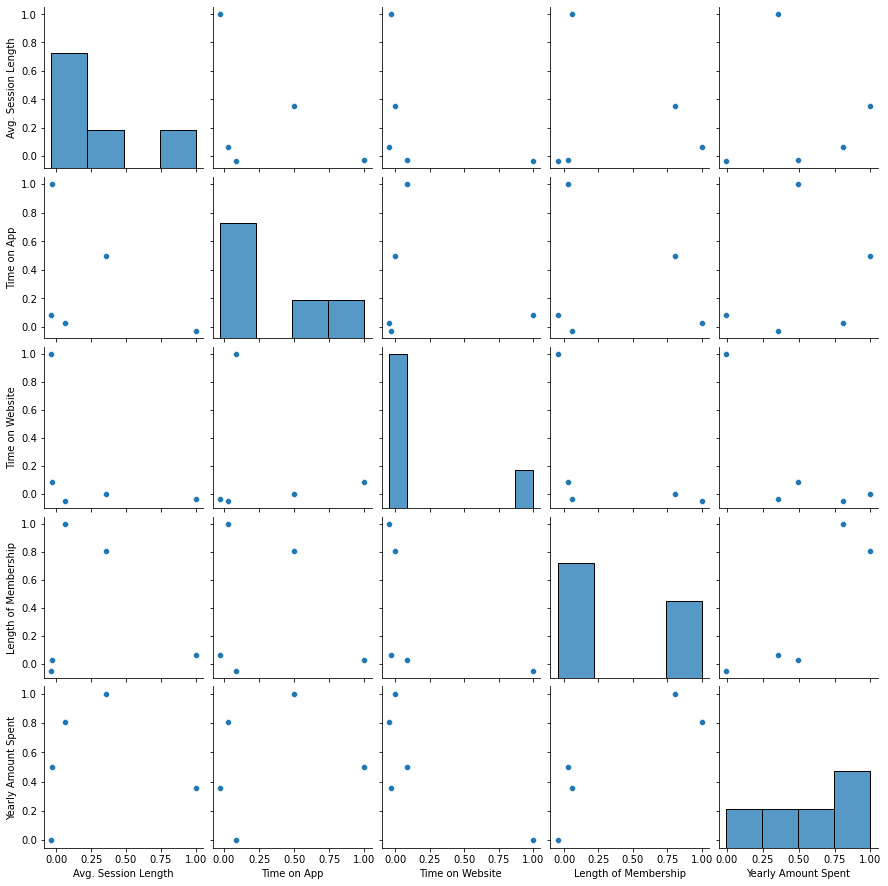

In [3]:
#sns.scatterplot( data=data.corr())#,legend=None)
sns.pairplot(data.corr() )
plt.show()

From the plots, we should see that data distribution is quite normal, and that there is a clear correlation between length of membership and yearly amount spent.

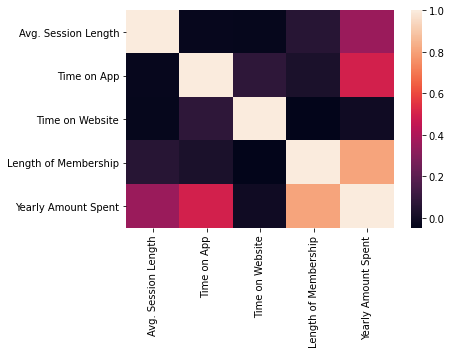

In [4]:
sns.heatmap(data.corr())
plt.show()

The above heatmap confirms the correlation between 'length of membership' and 'Yearly amount spent'. We can also see that there is good degree of correlation between 'Yearly amount spent' and the column 'Time on app'. Also lesser degree of correlation with 'Avg. Session length'

For now we will develop a Linear Regression model where are dependent/Predicted(y) variable is 'Yearly Amount Spent' whereas 'Time on App' and 'Length of Membership' would be our independent variables(x).

# Task 3
1. Split Customers into x and y where x and y are df of independent and dependent variables respectively.
2. Split x and y into train and test using a test size of 0.3. You may use SKlearn to perform the split.
3. Use the train and test data to create a Linear Regression Model 'lm' and fit it. You may use SKLearn.
4. Use the model to predict for x_test and store the ir in 'result'

In [5]:
x = data[['Length of Membership', 'Time on App']]   #Time on App and Length of Membership
y = data[['Yearly Amount Spent']]   #Yearly Amount Spent

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [8]:
result = lm.predict(x_test)

# Task 4
1. Plot a scatter plot for 'Actual Values' vs the 'Predicted Values'
2. Plot a learning curve based on the model developed and the x and y data. Complete  the plot_lc() to achieve it. You may use seaborn, sklearn and pyplot to achieve this. (cv = 5)

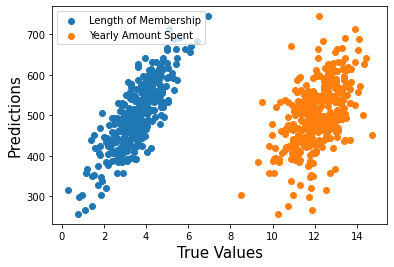

In [9]:
plt.scatter(x_train.iloc[:, 0], y_train, label = "Length of Membership")
plt.scatter(x_train.iloc[:, 1], y_train, label = "Yearly Amount Spent")
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.legend()
plt.show()

In [10]:
# Function to Plot Learning curve
def plot_lc(estimator, x, y, train_sizes):
    #Your code goes here
    train_sizes, train_scores, test_scores = learning_curve(estimator, x, y, cv=5, train_sizes=train_sizes)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

Here we are calling the plot_lc(). The output should show the learning curve.

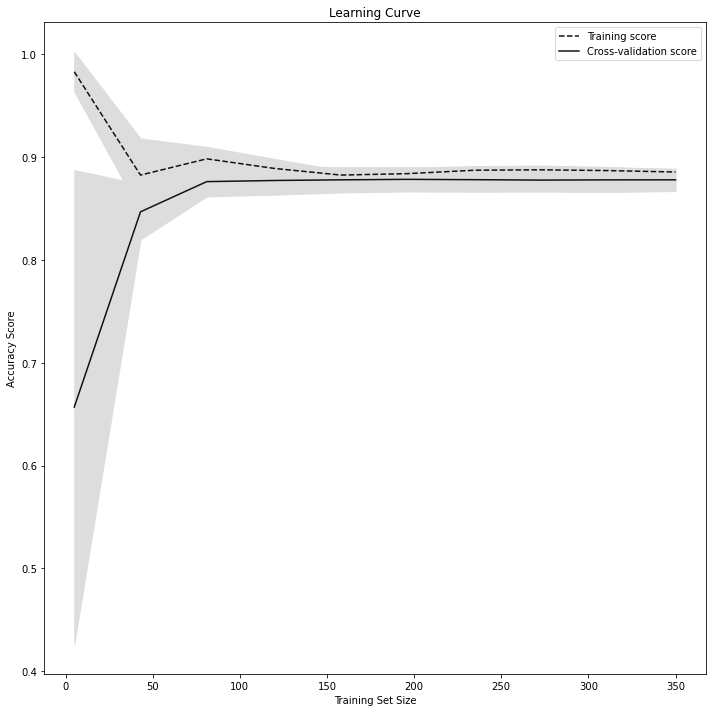

In [11]:
plot_lc(lm,x,y,np.linspace(5, len(x_train), 10, dtype='int'))

# Task 5

Learning curve for the linear regression model shows small gap between training and validation error, meaning that variance should be reduced.  

Print the R2 Score,Variance and MSE. You may use SKLearn.

In [12]:
print( "The R^2 score is: ",r2_score(result,y_test))#y_test, y_train)
print( "The varience of error is: ",  int(np.var((result - y_test))) )
print( "The varience of absolute error is: ",  int(np.var(np.abs(result - y_test))) )
print( "The mean squared error is: ", mean_squared_error(result, y_test) )

The R^2 score is:  0.8735934417035112
The varience of error is:  714
The varience of absolute error is:  231
The mean squared error is:  723.4930901022014


# Task 6

We can obcserve that all though the model is predicting well the variance is high. One way to tackle this is to use additional independent variable and build the model again. So lets consider 'Avg. Session Length' as well to build the new model 'lm1'.

1. Build model lm1 using 'Avg.Session Length', Time on App' and 'Length of Membership'
2. Use this model lm1 and reperform task 4 and task5.
3. Compare the results and share your thoughts on what difference has adding another independent variable has done.

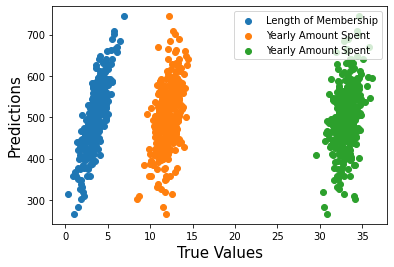

In [13]:
x = data[['Length of Membership', 'Time on App', 'Avg. Session Length']]   #Time on App and Length of Membership
y = data[['Yearly Amount Spent']]   #Yearly Amount Spent
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lm = LinearRegression()
lm.fit(x_train, y_train)
result = lm.predict(x_test)
plt.scatter(x_train.iloc[:, 0], y_train, label = "Length of Membership")
plt.scatter(x_train.iloc[:, 1], y_train, label = "Yearly Amount Spent")
plt.scatter(x_train.iloc[:, 2], y_train, label = "Yearly Amount Spent")
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.legend()
plt.show()

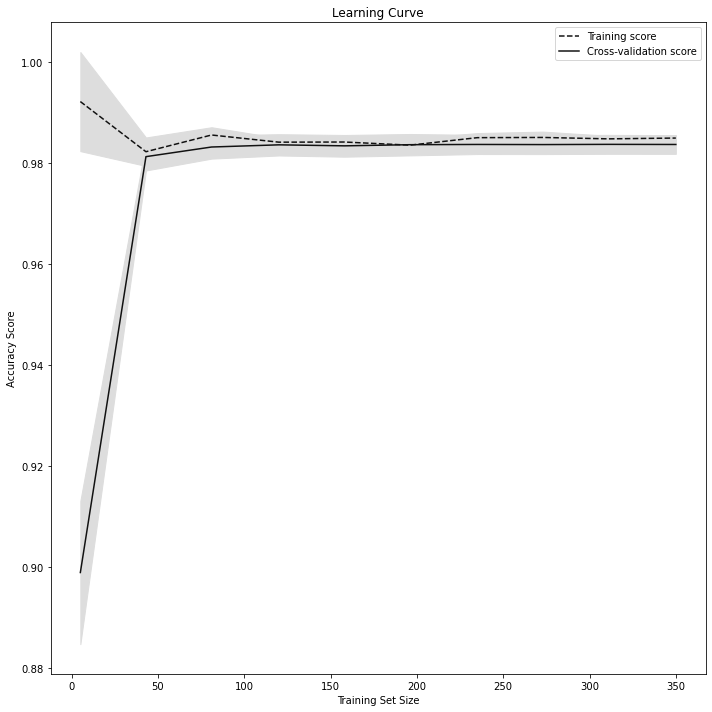

In [14]:
plot_lc(lm,x,y,np.linspace(5, len(x_train), 10, dtype='int'))

In [15]:
print( "The R^2 score is: ",r2_score(result,y_test))#y_test, y_train)
print( "The varience of error is: ",  int(np.var((result - y_test))) )
print( "The varience of absolute error is: ",  int(np.var(np.abs(result - y_test))) )
print( "The mean squared error is: ", mean_squared_error(result, y_test) )

The R^2 score is:  0.9875449717564442
The varience of error is:  85
The varience of absolute error is:  33
The mean squared error is:  85.75582739510013


* In this case adding this particular independent variable helped on predicting the true variable, as given by the significant smaller varience as well as the mean squared error, as a resilt we are getting values that are closer to the actual values.